# 6.5 - Modelos Lieares Generalizados (GLM)

O Modelo Linear Generalizado (GLiM, ou GLM) é uma técnica de modelagem estatística avançada formulada por John Nelder e Robert Wedderburn em 1972. É um termo abrangente que abrange muitos outros modelos, o que permite que a variável de resposta y tenha uma distribuição de erro diferente de um distribuição normal. Os modelos incluem regressão linear, regressão logística e regressão de Poisson.

Em um modelo de regressão linear, a variável de resposta (também conhecida como dependente / alvo) 'y' é expressa como uma função linear / combinação linear de todos os preditores 'X' (também conhecidos como variáveis independentes / regressão / explicativas / observadas). A relação subjacente entre a resposta e os preditores é linear (ou seja, podemos simplesmente visualizar a relação na forma de uma linha reta). Além disso, a distribuição de erro da variável de resposta deve ser distribuída normalmente. Portanto, estamos construindo um modelo linear.

Os modelos GLM nos permitem construir uma relação linear entre a resposta e os preditores, embora sua relação subjacente não seja linear. Isso é possível com o uso de uma função de link, que vincula a variável de resposta a um modelo linear. Ao contrário dos modelos de regressão linear, a distribuição de erro da variável de resposta não precisa ser normalmente distribuída. Os erros na variável de resposta são assumidos para seguir uma família exponencial de distribuição (ou seja, normal, binomial, Poisson ou distribuições gama). Como estamos tentando generalizar um modelo de regressão linear que também pode ser aplicado nesses casos, o nome Modelos Lineares Generalizados.

Semelhante ao modelo de regressão linear, existem algumas suposições básicas para modelos lineares generalizados também. A maioria das suposições são semelhantes aos modelos de regressão linear, enquanto algumas das suposições de regressão linear são modificadas.

* Os dados devem ser independentes e aleatórios (cada variável aleatória tem a mesma distribuição de probabilidade).
* A variável de resposta y não precisa ser normalmente distribuída, mas a distribuição é de uma família exponencial (por exemplo, binomial, Poisson, multinomial, normal)
* A variável de resposta original não precisa ter uma relação linear com as variáveis independentes, mas a variável de resposta transformada (por meio da função de link) é linearmente dependente das variáveis independentes

Existem três componentes em modelos lineares generalizados.
* **Linear predictor**: é modelado o valor médio esperado de uma variável de resposta contínua como uma função das variáveis explicativas. A função de link de identidade é usada, que é a função de link mais simples. Se houver apenas 1 preditor, o modelo é chamado de Regressão Linear Simples. Se houver 2 ou mais variáveis explicativas, o modelo é chamado de Regressão Linear Múltipla.

* **Link function**: literalmente “liga” o preditor linear e o parâmetro para distribuição de probabilidade. No caso da regressão de Poisson, a função de link típica é a função de link de log. Isso ocorre porque o parâmetro para regressão de Poisson deve ser positivo

* **Probability distribution**: que gera a variável observada y. Podendo ser usada uma distribuição de Poisson por exemplo.



Diferença entre o modelo linear generalizado e o modelo linear geral:

Modelos Lineares Gerais, também representados como GLM, é um caso especial de Modelos Lineares Generalizados (GLiM). Modelos Lineares Gerais referem-se a modelos de regressão linear normal com uma variável de resposta contínua. Inclui muitos modelos estatísticos como Regressão Linear Simples, Regressão Linear Múltipla, Anova, Ancova, Manova, Mancova, teste t e teste F. Os Modelos Lineares Gerais assumem que os resíduos / erros seguem uma distribuição normal. O Modelo Linear Generalizado, por outro lado, permite que os resíduos tenham outras distribuições da família exponencial de distribuições.

In [2]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [3]:
print(sm.datasets.star98.NOTE)


::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [4]:
data = sm.datasets.star98.load(as_pandas=False)
data.exog = sm.add_constant(data.exog, prepend=False)

In [5]:
print(data.endog[:5,:])

[[452. 355.]
 [144.  40.]
 [337. 234.]
 [395. 178.]
 [  8.  57.]]


In [6]:
print(data.exog[:2,:])

[[3.43973000e+01 2.32993000e+01 1.42352800e+01 1.14111200e+01
  1.59183700e+01 1.47064600e+01 5.91573200e+01 4.44520700e+00
  2.17102500e+01 5.70327600e+01 0.00000000e+00 2.22222200e+01
  2.34102872e+02 9.41688110e+02 8.69994800e+02 9.65065600e+01
  2.53522420e+02 1.23819550e+03 1.38488985e+04 5.50403520e+03
  1.00000000e+00]
 [1.73650700e+01 2.93283800e+01 8.23489700e+00 9.31488400e+00
  1.36363600e+01 1.60832400e+01 5.95039700e+01 5.26759800e+00
  2.04427800e+01 6.46226400e+01 0.00000000e+00 0.00000000e+00
  2.19316851e+02 8.11417560e+02 9.57016600e+02 1.07684350e+02
  3.40406090e+02 1.32106640e+03 1.30502233e+04 6.95884680e+03
  1.00000000e+00]]


In [7]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Thu, 16 Sep 2021   Deviance:                       4078.8
Time:                        14:50:58   Pearson chi2:                 4.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.0

In [8]:
print('Total number of trials:',  data.endog[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 807.0
Parameters:  [-1.68150366e-02  9.92547661e-03 -1.87242148e-02 -1.42385609e-02
  2.54487173e-01  2.40693664e-01  8.04086739e-02 -1.95216050e+00
 -3.34086475e-01 -1.69022168e-01  4.91670212e-03 -3.57996435e-03
 -1.40765648e-02 -4.00499176e-03 -3.90639579e-03  9.17143006e-02
  4.89898381e-02  8.04073890e-03  2.22009503e-04 -2.24924861e-03
  2.95887793e+00]
T-values:  [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


In [9]:
means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:,0], 25)
means75 = means.copy()
means75[0] = lowinc_75per = stats.scoreatpercentile(data.exog[:,0], 75)
resp_25 = res.predict(means25)
resp_75 = res.predict(means75)
diff = resp_75 - resp_25

In [10]:
print("%2.4f%%" % (diff*100))

-11.8753%


In [11]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

In [12]:
from statsmodels.graphics.api import abline_plot

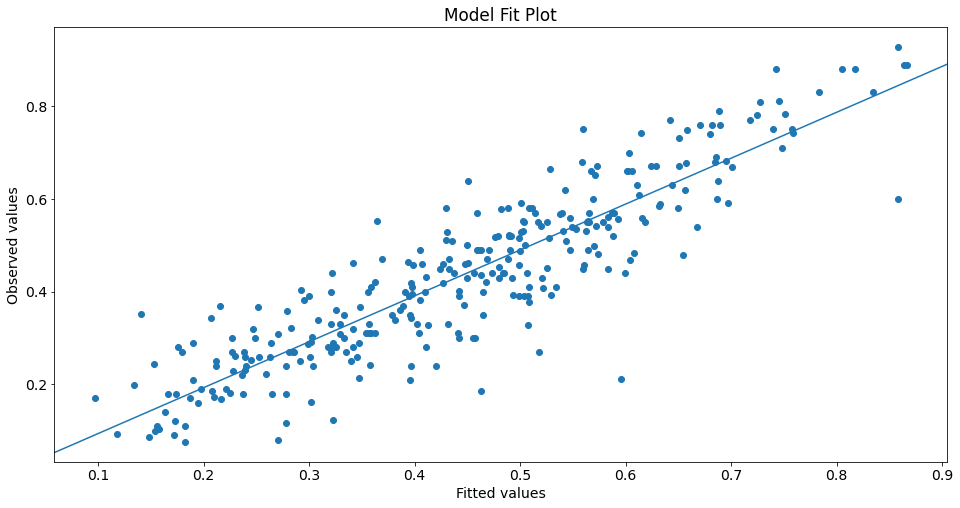

In [13]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Text(0.5, 0, 'Fitted values')

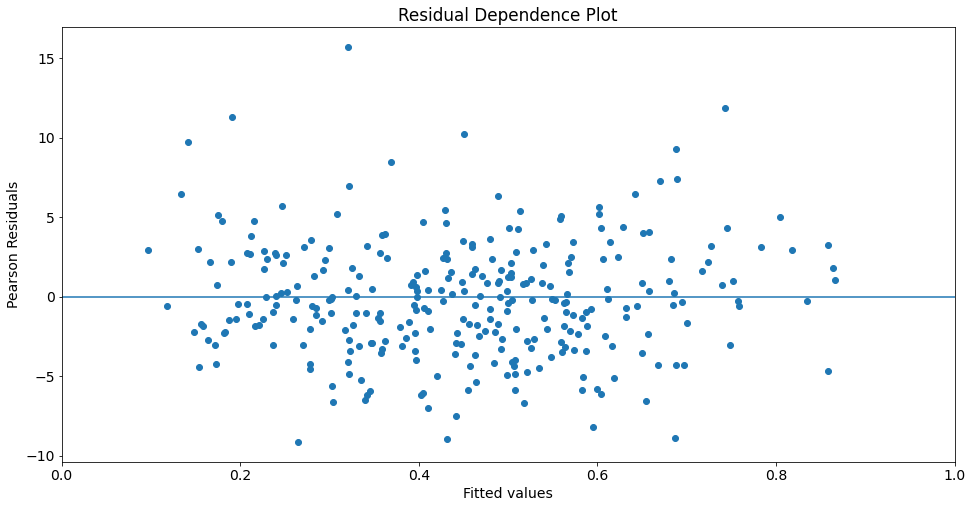

In [14]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

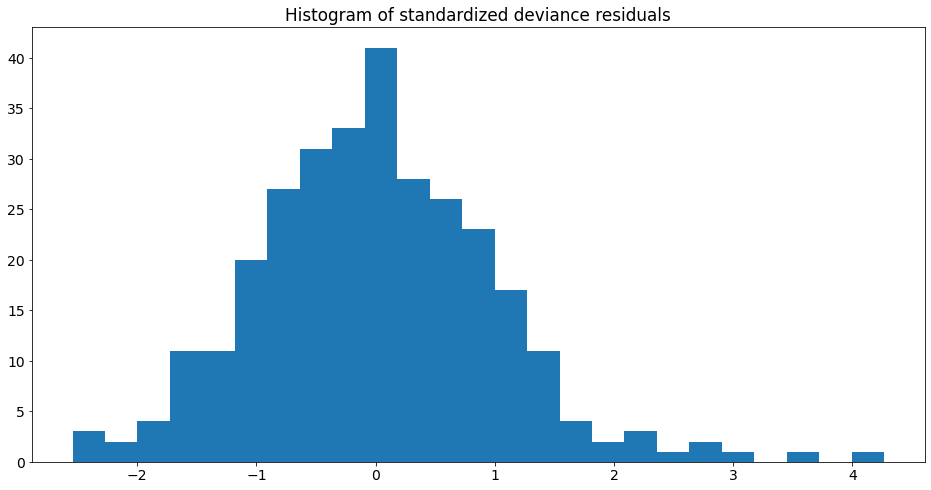

In [15]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

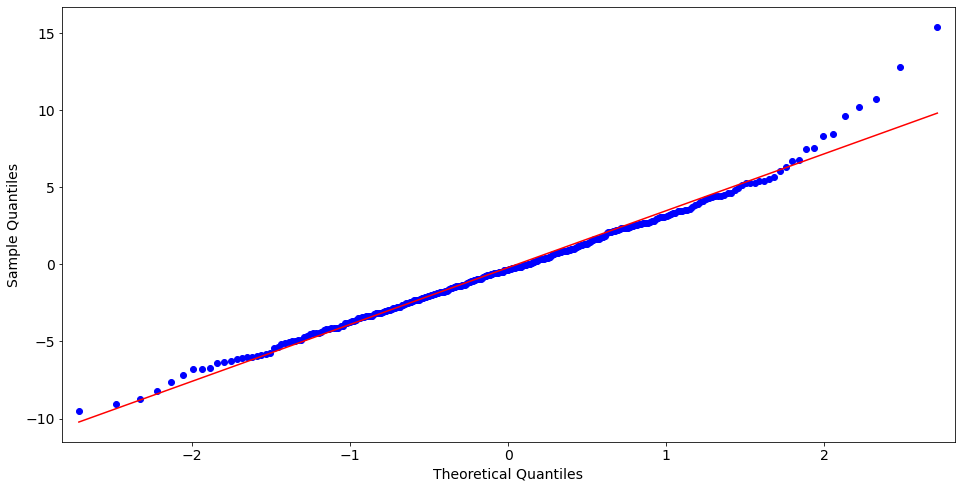

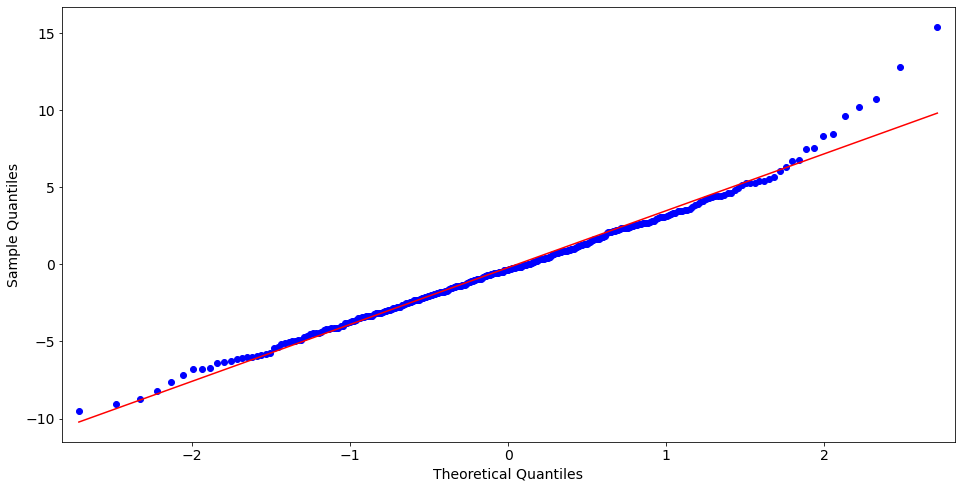

In [16]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')